<a href="https://colab.research.google.com/github/RithwikMohan/ML_Lab/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/diabetes.csv")
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Pre processing the data by dealing with missing values and data splitting too.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())
print("\nMissing values in each column:")
print(df.isnull().sum())

cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].median())

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("\n✅ Preprocessing done successfully!")
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null  

In [ ]:
#1 Comparing Single vs. Ensemble Classifiers
#Decision trees and random forest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier # Changed from DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier # Changed from RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix # Corrected imports

cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)
df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].median())

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

dt_clf = DecisionTreeClassifier(random_state=42) # Changed from dt_reg
dt_clf.fit(X_train, y_train) # Changed from dt_reg
y_pred_dt = dt_clf.predict(X_test) # Changed from dt_reg

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42) # Changed from rf_reg
rf_clf.fit(X_train, y_train) # Changed from rf_reg
y_pred_rf = rf_clf.predict(X_test) # Changed from rf_reg

# Removed R2 and MSE as they are for regression
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Decision Tree Precision:", precision_score(y_test, y_pred_dt)) # Corrected function name
print("Random Forest Precision:", precision_score(y_test, y_pred_rf)) # Corrected function name
print("Decision Tree Recall:", recall_score(y_test, y_pred_dt)) # Corrected function name
print("Random Forest Recall:", recall_score(y_test, y_pred_rf)) # Corrected function name
print("Decision Tree F1-score:", f1_score(y_test, y_pred_dt)) # Added F1-score
print("Random Forest F1-score:", f1_score(y_test, y_pred_rf)) # Added F1-score

Decision Tree Confusion Matrix:
[[79 21]
 [28 26]]
Random Forest Confusion Matrix:
[[88 12]
 [22 32]]
Decision Tree Accuracy: 0.6818181818181818
Random Forest Accuracy: 0.7792207792207793
Decision Tree Precision: 0.5531914893617021
Random Forest Precision: 0.7272727272727273
Decision Tree Recall: 0.48148148148148145
Random Forest Recall: 0.5925925925925926
Decision Tree F1-score: 0.5148514851485149
Random Forest F1-score: 0.6530612244897959


This shows that Random Forest performs better than single Decision Tree on all metrics because Random Forest is an ensemble of many Decision Trees.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix # Changed to classification metrics

cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)
df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].median())

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

estimators = [10, 50, 100, 200, 300, 500]
print("n_estimators | Accuracy | Precision | Recall | F1-score") # Updated header

for n in estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=42) # Changed from RandomForestRegressor
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{n:<12} | {accuracy:.4f} | {precision:.4f} | {recall:.4f} | {f1:.4f}") # Updated print format

n_estimators | Accuracy | Precision | Recall | F1-score
10           | 0.7100 | 0.6129 | 0.4691 | 0.5315
50           | 0.7576 | 0.6984 | 0.5432 | 0.6111
100          | 0.7403 | 0.6667 | 0.5185 | 0.5833
200          | 0.7446 | 0.6719 | 0.5309 | 0.5931
300          | 0.7403 | 0.6615 | 0.5309 | 0.5890
500          | 0.7532 | 0.6818 | 0.5556 | 0.6122


As the number of estimators increases, the accuracy and F1-score of the Random Forest model improve at first but then remain almost the same. The best performance is seen around 50–100 estimators. After that, adding more trees does not make much difference. So, using about 50–100 estimators gives good accuracy without taking extra time.

In [ ]:
#2 Implementing Simple Ensemble Techniques
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)
df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].median())

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

model1 = LogisticRegression(max_iter=1000)
model2 = DecisionTreeClassifier(random_state=42)
model3 = RandomForestClassifier(n_estimators=100, random_state=42)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

acc1 = accuracy_score(y_test, pred1)
acc2 = accuracy_score(y_test, pred2)
acc3 = accuracy_score(y_test, pred3)

print("Individual Model Accuracies:")
print("Logistic Regression:", acc1)
print("Decision Tree:", acc2)
print("Random Forest:", acc3)

preds = np.array([pred1, pred2, pred3])
final_pred_max = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=preds)
print("Max Voting Accuracy:", accuracy_score(y_test, final_pred_max))

proba1 = model1.predict_proba(X_test)[:, 1]
proba2 = model2.predict_proba(X_test)[:, 1]
proba3 = model3.predict_proba(X_test)[:, 1]

avg_proba = (proba1 + proba2 + proba3) / 3
final_pred_avg = (avg_proba >= 0.5).astype(int)
print("Average Voting Accuracy:", accuracy_score(y_test, final_pred_avg))

weights = np.array([acc1, acc2, acc3])
weighted_avg = (proba1 * weights[0] + proba2 * weights[1] + proba3 * weights[2]) / weights.sum()
final_pred_weighted = (weighted_avg >= 0.5).astype(int)
print("Weighted Average Voting Accuracy:", accuracy_score(y_test, final_pred_weighted))


Individual Model Accuracies:
Logistic Regression: 0.7445887445887446
Decision Tree: 0.6883116883116883
Random Forest: 0.7402597402597403
Max Voting Accuracy: 0.7489177489177489
Average Voting Accuracy: 0.7575757575757576
Weighted Average Voting Accuracy: 0.7619047619047619


This shows that combining multiple models gives better and more stable predictions than using any single model alone.
Among all, the Weighted Average Voting gives the highest accuracy, meaning it effectively uses the strengths of all models.

In [ ]:
#3 Hard Voting vs. Soft Voting Classifiers
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv('/content/diabetes.csv')

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf1 = DecisionTreeClassifier(random_state=42)
clf2 = LogisticRegression(random_state=42, max_iter=1000)
clf3 = KNeighborsClassifier(n_neighbors=5)

hard_voting_clf = VotingClassifier(
    estimators=[('dt', clf1), ('lr', clf2), ('knn', clf3)],
    voting='hard'
)

soft_voting_clf = VotingClassifier(
    estimators=[('dt', clf1), ('lr', clf2), ('knn', clf3)],
    voting='soft'
)

hard_voting_clf.fit(X_train_scaled, y_train)
soft_voting_clf.fit(X_train_scaled, y_train)

y_pred_hard = hard_voting_clf.predict(X_test_scaled)
y_pred_soft = soft_voting_clf.predict(X_test_scaled)

print("Accuracy of Hard Voting Classifier:", accuracy_score(y_test, y_pred_hard))
print("Accuracy of Soft Voting Classifier:", accuracy_score(y_test, y_pred_soft))

for clf, name in zip([clf1, clf2, clf3], ['Decision Tree', 'Logistic Regression', 'KNN']):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(f"Accuracy of {name}: {accuracy_score(y_test, y_pred)}")


Accuracy of Hard Voting Classifier: 0.7575757575757576
Accuracy of Soft Voting Classifier: 0.7922077922077922
Accuracy of Decision Tree: 0.7619047619047619
Accuracy of Logistic Regression: 0.7445887445887446
Accuracy of KNN: 0.7142857142857143


The Soft Voting Classifier gives the highest accuracy because it considers the probability outputs of all models instead of just their final predictions.

In [ ]:
#4 Exploring Bagging Technique (Random Forest)
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Pima Indians Diabetes dataset
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI',
           'DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv("/content/diabetes.csv")

# 2. Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 3. Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Standardize features (good for most models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Function to train Random Forest with different parameters
def train_random_forest(n_estimators=100, max_depth=None, random_state=42):
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=random_state
    )
    rf.fit(X_train_scaled, y_train)
    y_train_pred = rf.predict(X_train_scaled)
    y_test_pred = rf.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"Random Forest (n_estimators={n_estimators}, max_depth={max_depth}, random_state={random_state})")
    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Test Accuracy: {test_acc:.4f}\n")
    return rf

# 6. Experiment 1: Change number of estimators
print("=== Experiment 1: Varying n_estimators ===")
for n in [10, 50, 100, 200]:
    train_random_forest(n_estimators=n)

# 7. Experiment 2: Change max_depth
print("=== Experiment 2: Varying max_depth ===")
for depth in [None, 3, 5, 7]:
    train_random_forest(max_depth=depth)

# 8. Experiment 3: Change random_state
print("=== Experiment 3: Varying random_state ===")
for rs in [0, 42, 100]:
    train_random_forest(random_state=rs)


=== Experiment 1: Varying n_estimators ===
Random Forest (n_estimators=10, max_depth=None, random_state=42)
  Training Accuracy: 0.9907
  Test Accuracy: 0.7229

Random Forest (n_estimators=50, max_depth=None, random_state=42)
  Training Accuracy: 1.0000
  Test Accuracy: 0.7359

Random Forest (n_estimators=100, max_depth=None, random_state=42)
  Training Accuracy: 1.0000
  Test Accuracy: 0.7532

Random Forest (n_estimators=200, max_depth=None, random_state=42)
  Training Accuracy: 1.0000
  Test Accuracy: 0.7619

=== Experiment 2: Varying max_depth ===
Random Forest (n_estimators=100, max_depth=None, random_state=42)
  Training Accuracy: 1.0000
  Test Accuracy: 0.7532

Random Forest (n_estimators=100, max_depth=3, random_state=42)
  Training Accuracy: 0.7952
  Test Accuracy: 0.7359

Random Forest (n_estimators=100, max_depth=5, random_state=42)
  Training Accuracy: 0.8678
  Test Accuracy: 0.7532

Random Forest (n_estimators=100, max_depth=7, random_state=42)
  Training Accuracy: 0.9385
 

In [ ]:
#5 Using RandomForestRegressor and OOB Score
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 1. Load the Pima Indians Diabetes dataset
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI',
           'DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv("/content/diabetes.csv")

# 2. Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']  # Regression on a binary target (0 or 1)

# 3. Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train RandomForestRegressor with OOB enabled
def train_rf_regressor(n_estimators=100, random_state=42):
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        oob_score=True,              # Enable Out-of-Bag evaluation
        bootstrap=True,              # Must be True for OOB
        random_state=random_state
    )
    rf.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = rf.predict(X_train_scaled)
    y_test_pred = rf.predict(X_test_scaled)

    # Scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    oob = rf.oob_score_

    print(f"RandomForestRegressor (n_estimators={n_estimators})")
    print(f"  Training R²: {train_r2:.4f}")
    print(f"  Test R²:     {test_r2:.4f}")
    print(f"  OOB Score:   {oob:.4f}\n")
    return rf

# 6. Experiment: Vary the number of trees
for n in [10, 50, 100, 200, 300]:
    train_rf_regressor(n_estimators=n)


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor (n_estimators=10)
  Training R²: 0.8613
  Test R²:     0.2983
  OOB Score:   0.0466

RandomForestRegressor (n_estimators=50)
  Training R²: 0.8933
  Test R²:     0.3086
  OOB Score:   0.2214

RandomForestRegressor (n_estimators=100)
  Training R²: 0.8955
  Test R²:     0.3072
  OOB Score:   0.2316

RandomForestRegressor (n_estimators=200)
  Training R²: 0.8976
  Test R²:     0.3077
  OOB Score:   0.2428

RandomForestRegressor (n_estimators=300)
  Training R²: 0.8974
  Test R²:     0.3090
  OOB Score:   0.2488



The OOB score estimates the model’s R² (coefficient of determination) using only the out-of-bag samples — i.e., the data not seen by each tree during training.
With fewer trees (n_estimators small), OOB estimates are noisy and unstable.
As n_estimators increases, the OOB score shows better generalization because more trees reduce variance.


In [ ]:
#6 Boosting Techniques
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# 1️⃣ Load dataset
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI',
           'DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv("/content/diabetes.csv")

# 2️⃣ Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 3️⃣ Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4️⃣ Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5️⃣ Train and evaluate each boosting model
def evaluate_model(model, name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    return acc

# --- AdaBoost ---
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
acc_ada = evaluate_model(ada, "AdaBoost Classifier")

# --- Gradient Boosting ---
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
acc_gb = evaluate_model(gb, "Gradient Boosting Classifier")

# --- XGBoost ---
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
acc_xgb = evaluate_model(xgb, "XGBoost Classifier")

# --- CatBoost ---
cat = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    silent=True,
    random_state=42
)
acc_cat = evaluate_model(cat, "CatBoost Classifier")

# Summary
print("\n=== Summary of Model Accuracies ===")
print(f"AdaBoost Accuracy:      {acc_ada:.4f}")
print(f"Gradient Boosting:      {acc_gb:.4f}")
print(f"XGBoost Accuracy:       {acc_xgb:.4f}")
print(f"CatBoost Accuracy:      {acc_cat:.4f}")


=== AdaBoost Classifier ===
Accuracy: 0.7576
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       150
           1       0.70      0.53      0.61        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231


=== Gradient Boosting Classifier ===
Accuracy: 0.7576
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.70      0.54      0.61        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:44:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost Classifier ===
Accuracy: 0.7576
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.68      0.59      0.63        81

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231


=== CatBoost Classifier ===
Accuracy: 0.7489
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.53      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231


=== Summary of Model Accuracies ===
AdaBoost Accuracy:      0.7576
Gradient Boosting:      0.7576
XGBoost Accuracy:       0.7576
CatBoost Accuracy:      0.7489


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


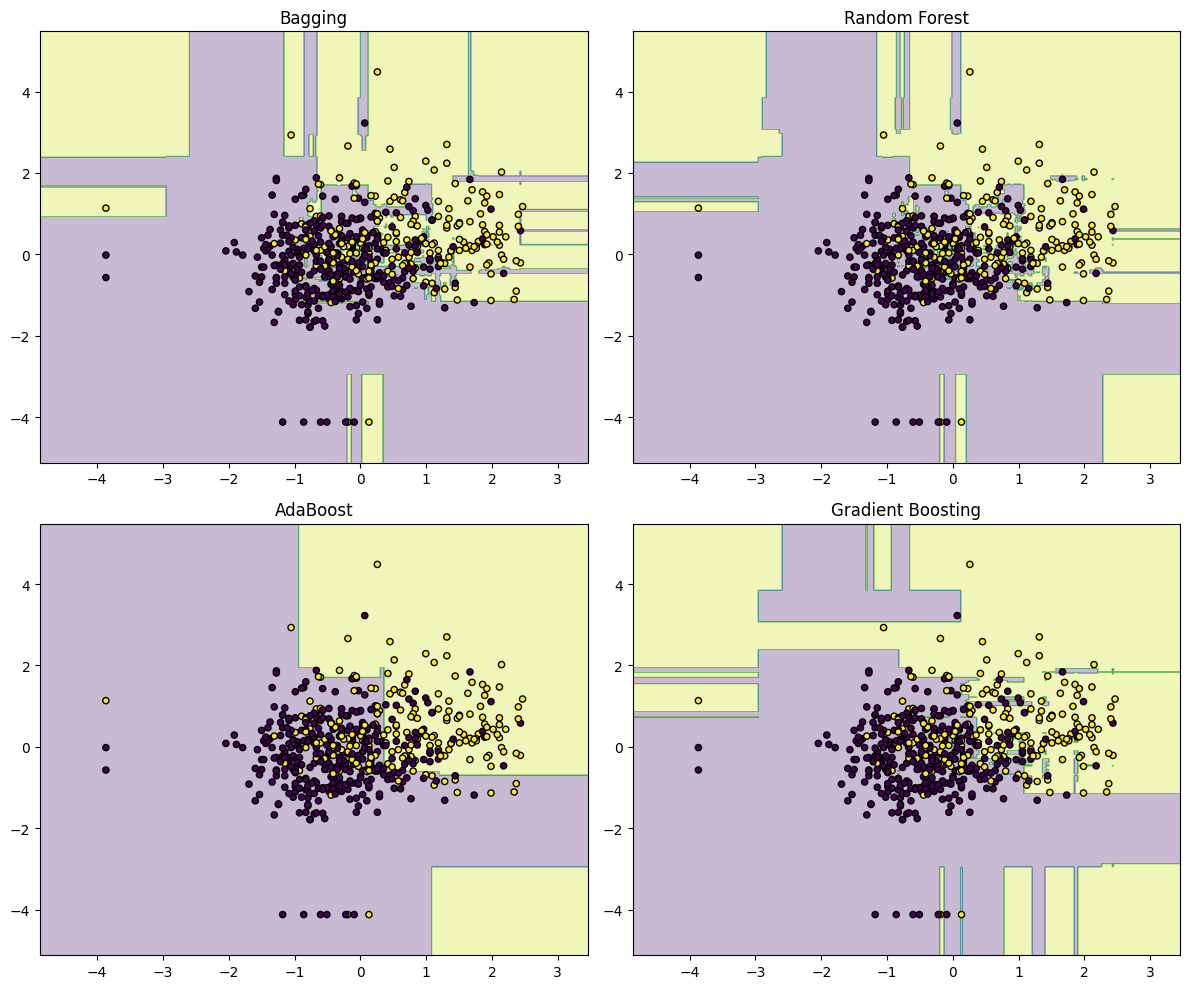

In [ ]:
#8 Visualizing the Ensemble models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Load dataset
df = pd.read_csv("/content/diabetes.csv")
X = df[['Glucose', 'BMI']]  # top 2 features (for visualization)
y = df['Outcome']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    "Bagging": BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Plot decision boundaries
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

plt.figure(figsize=(12, 10))
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train_scaled, y_train)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolor='k', s=20)
    plt.title(name)
plt.tight_layout()
plt.show()


In [ ]:
# Heterogeneous Ensemble Learning using VotingClassifier
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier

# 1️⃣ Load Dataset (Pima Indians Diabetes)
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
data = pd.read_csv('/content/diabetes.csv')

X = data.drop('Outcome', axis=1)
y = data['Outcome']

# 2️⃣ Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3️⃣ Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4️⃣ Base classifiers
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(probability=True, kernel='rbf', random_state=42)

# 5️⃣ Heterogeneous Ensemble - Hard Voting
voting_hard = VotingClassifier(estimators=[
    ('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)
], voting='hard')

# 6️⃣ Heterogeneous Ensemble - Soft Voting
voting_soft = VotingClassifier(estimators=[
    ('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)
], voting='soft')

# 7️⃣ Homogeneous Ensembles for comparison
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 8️⃣ Train and evaluate all models
models = {
    "Decision Tree": dt,
    "KNN": knn,
    "Logistic Regression": lr,
    "SVM": svm,
    "Voting (Hard)": voting_hard,
    "Voting (Soft)": voting_soft,
    "Bagging": bagging,
    "Random Forest": rf
}

results = []

for name, model in models.items():
    start = time.time()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    end = time.time()
    results.append((name, acc, end-start))
    print(f"{name}: Accuracy = {acc:.4f}, Training Time = {end-start:.3f}s")

# 9️⃣ Display comparative results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Training Time"])
print("\n=== Comparative Results ===")
print(results_df.sort_values(by="Accuracy", ascending=False))

# 10️⃣ Detailed classification report for best model
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)
print(f"\nBest Model: {best_model_name}")
print(classification_report(y_test, y_pred_best))


Decision Tree: Accuracy = 0.7619, Training Time = 0.012s
KNN: Accuracy = 0.7143, Training Time = 0.012s
Logistic Regression: Accuracy = 0.7446, Training Time = 0.007s
SVM: Accuracy = 0.7532, Training Time = 0.097s
Voting (Hard): Accuracy = 0.7619, Training Time = 0.154s
Voting (Soft): Accuracy = 0.7835, Training Time = 0.171s
Bagging: Accuracy = 0.7532, Training Time = 0.344s
Random Forest: Accuracy = 0.7532, Training Time = 0.356s

=== Comparative Results ===
                 Model  Accuracy  Training Time
5        Voting (Soft)  0.783550       0.170966
0        Decision Tree  0.761905       0.011987
4        Voting (Hard)  0.761905       0.154207
3                  SVM  0.753247       0.096557
6              Bagging  0.753247       0.343731
7        Random Forest  0.753247       0.356049
2  Logistic Regression  0.744589       0.006927
1                  KNN  0.714286       0.011893

Best Model: Voting (Soft)
              precision    recall  f1-score   support

           0       0.

In [ ]:
# Comparative study of homogeneous and heterogeneous ensembles
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier

# 1️⃣ Load dataset
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
data = pd.read_csv('/content/diabetes.csv')

X = data.drop('Outcome', axis=1)
y = data['Outcome']

# 2️⃣ Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3️⃣ Base models
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(probability=True, kernel='rbf', random_state=42)

# 4️⃣ Homogeneous Ensembles
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 5️⃣ Heterogeneous Ensembles
voting = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('dt', dt), ('svm', svm)], voting='soft')
stacking = StackingClassifier(
    estimators=[('lr', lr), ('knn', knn), ('dt', dt), ('svm', svm)],
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True
)

# 6️⃣ Train & evaluate
models = {
    "Decision Tree": dt,
    "Bagging": bagging,
    "Random Forest": rf,
    "Voting (Soft)": voting,
    "Stacking": stacking
}

results = []
for name, model in models.items():
    start = time.time()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    end = time.time()
    results.append((name, acc, end-start))
    print(f"{name}: Accuracy = {acc:.4f}, Time = {end-start:.3f}s")

# 7️⃣ Compare Results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Training Time (s)"])
print("\n=== Comparative Summary ===")
print(results_df.sort_values(by="Accuracy", ascending=False))

# 8️⃣ Detailed report for best model
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")
print(classification_report(y_test, best_model.predict(X_test_scaled)))


Decision Tree: Accuracy = 0.7619, Time = 0.005s
Bagging: Accuracy = 0.7532, Time = 0.223s
Random Forest: Accuracy = 0.7532, Time = 0.238s
Voting (Soft): Accuracy = 0.7835, Time = 0.108s
Stacking: Accuracy = 0.7446, Time = 1.253s

=== Comparative Summary ===
           Model  Accuracy  Training Time (s)
3  Voting (Soft)  0.783550           0.108206
0  Decision Tree  0.761905           0.005391
1        Bagging  0.753247           0.222707
2  Random Forest  0.753247           0.238180
4       Stacking  0.744589           1.252754

Best Model: Voting (Soft)
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       150
           1       0.75      0.57      0.65        81

    accuracy                           0.78       231
   macro avg       0.77      0.73      0.75       231
weighted avg       0.78      0.78      0.78       231

